# Zadanie domowe: generator obrazów psów
### Autorzy:
* Wojciech Rosenthal, indeks 180458
* Grzegorz Pozorski, indeks 180169
### Informacje:
* Grupa: Uczenie maszynowe 2
* Przedmiot: Uczenie głębokie
* Data: 22.01.2024 r.
* Specjalność: Uczenie maszynowe

# I pobranie danych

In [1]:
!curl https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip -o kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1  786M    1 8525k    0     0  7345k      0  0:01:49  0:00:01  0:01:48 7355k
  2  786M    2 17.7M    0     0  8376k      0  0:01:36  0:00:02  0:01:34 8385k
  3  786M    3 27.2M    0     0  8837k      0  0:01:31  0:00:03  0:01:28 8843k
  4  786M    4 36.9M    0     0  9084k      0  0:01:28  0:00:04  0:01:24 9089k
  5  786M    5 46.5M    0     0  9237k      0  0:01:27  0:00:05  0:01:22 9541k
  7  786M    7 56.2M    0     0  9341k      0  0:01:26  0:00:06  0:01:20 9804k
  8  786M    8 65.8M    0     0  9418k      0  0:01:25  0:00:07  0:01:18 9870k
  9  786M    9 75.2M    0     0  9443k      0  0:01:25  0:00:08  0:01:17 9825k
 10  786M   10 84.9M    0     0  9490k      0  0:01

In [3]:
!unzip kagglecatsanddogs_5340.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


# II przetwarzanie wstępne

In [2]:
import numpy as np
import tensorflow as tf
import cv2
import time
import torch
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

import os
import random

print(tf.__version__)

2.10.0


In [2]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
dirpath = 'kagglecatsanddogs_5340/PetImages/Dog/'
filenames = [filename for filename in os.listdir(dirpath) if filename.endswith(".jpg")]
print(f"Total number of images: {len(filenames)}")

FileNotFoundError: [WinError 3] System nie może odnaleźć określonej ścieżki: 'kagglecatsanddogs_5340/PetImages/Dog/'

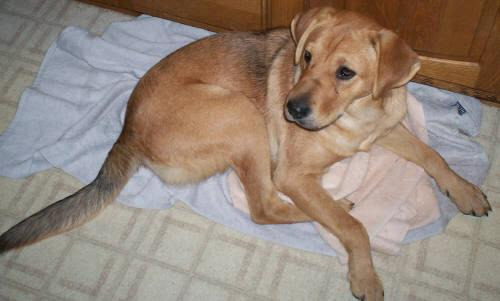

In [7]:
sample = dirpath + random.choice(filenames)
img = Image.open(sample)
display(img)

Wykrycie psów na obrazach i przycięcie ich

In [8]:
def make_square(image):
    height, width = image.shape[:2]

    max_side = max(height, width)
    top = bottom = left = right = 0

    if height < max_side:
        diff = max_side - height
        top = diff // 2
        bottom = diff - top
    elif width < max_side:
        diff = max_side - width
        left = diff // 2
        right = diff - left

    mean_color = cv2.mean(image)
    mean_color = tuple(map(int, mean_color))
    padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=mean_color)

    return padded_image

In [9]:
preprocessed_dirpath = 'kagglecatsanddogs_5340/PetImages/Dog-preprocessed/'

if not os.path.exists(preprocessed_dirpath):
    os.makedirs(preprocessed_dirpath)

In [11]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/wojtero/.cache/torch/hub/master.zip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.1/701.1 kB 7.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 7.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 34.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 40.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 34.8 MB/s eta 0:00:0

YOLOv5 🚀 2024-1-20 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16057MiB)

100.0%

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


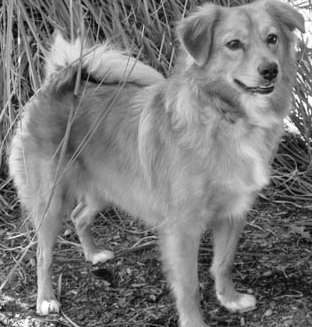

In [12]:
sample = 'kagglecatsanddogs_5340/PetImages/Dog/' + '10003.jpg'
image = cv2.imread(sample, cv2.IMREAD_COLOR)
results = model(image)

pd_results = results.pandas().xyxy[0]
pd_results = pd_results[pd_results['name'] == 'dog']
pd_results = pd_results[pd_results['confidence'] > 0.5]
top, bottom, left, right = pd_results[['ymax', 'ymin', 'xmin', 'xmax']].values[0]
left, right, top, bottom = round(left), round(right), round(top), round(bottom)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped_image = image[bottom:top, left:right]

img = Image.fromarray(cropped_image)
display(img)

In [4]:
def process_image(filename, dirpath, preprocessed_dirpath):
    try:
        image = cv2.imread(dirpath + filename, cv2.IMREAD_COLOR)
        width, height = image.shape[:2]
        
        results = model(image) 
        
        pd_results = results.pandas().xyxy[0]
        pd_results = pd_results[pd_results['name'] == 'dog']
        pd_results = pd_results[pd_results['confidence'] > 0.5]
        if len(pd_results) == 0:
            return None
        top, bottom, left, right = pd_results[['ymax', 'ymin', 'xmin', 'xmax']].values[0]
        left, right, top, bottom = round(left), round(right), round(top), round(bottom)
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        cropped_image = image[bottom:top, left:right]
        
        padded_image = make_square(cropped_image)
        padded_resized_image = cv2.resize(padded_image, IMAGE_SIZE)
        
        cv2.imwrite(preprocessed_dirpath + filename, padded_resized_image)
        
        return width, height
    except Exception as e:
        raise Exception(f"Error processing {filename}: {e}")

In [14]:
mean_size = np.zeros(2)
cnt = 0

start_time = time.time()
for filename in filenames:
    try:
        shape = process_image(filename, dirpath, preprocessed_dirpath)
        if shape:
            mean_size += np.array(shape[:2])
            cnt += 1
    except Exception as e:
        print(f"An error occurred: {e}")

end_time = time.time()
print(f"Total time: {end_time - start_time}")
print(f"Mean size: {mean_size / cnt}.\nTotal count: {cnt}")

An error occurred: Error processing 7112.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 6059.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


An error occurred: Error processing 7459.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


An error occurred: Error processing 10401.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 10158.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


An error occurred: Error processing 1866.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 10797.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


An error occurred: Error processing 3136.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 4367.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 10747.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 11849.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 6718.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


An error occurred: Error processing 5736.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 7133.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 9188.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 5604.jpg: 'NoneType' object has no attribute 'shape'


Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


An error occurred: Error processing 3288.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 6238.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 8730.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 3588.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 11702.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 7969.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 1308.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 7369.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 2688.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 2384.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 11853.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: 

Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9


An error occurred: Error processing 11675.jpg: 'NoneType' object has no attribute 'shape'
An error occurred: Error processing 2877.jpg: 'NoneType' object has no attribute 'shape'
Total time: 72.31985402107239
Mean size: [     380.97      420.61].
Total count: 6489


Total time: 1510.6200618743896

Mean size: [381 420.6]

Total count: 6487

In [10]:
X = np.zeros((len(filenames), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.uint8)
for filename in filenames:
    image = cv2.imread(preprocessed_dirpath + filename, cv2.IMREAD_GRAYSCALE)
    X[filenames.index(filename)] = image.reshape(IMAGE_HEIGHT, IMAGE_WIDTH, 1) / 255.0
    
X_orig = X.copy()

print(X.shape)

(6487, 64, 64, 1)


In [11]:
ratio = 0.8

X = X_orig.copy()

split_index = round(X.shape[0] * ratio)
X_train_val = X[:split_index]
X_test = X[split_index:]

split_index_train_val = round(X_train_val.shape[0] * ratio)
X_train = X_train_val[:split_index_train_val]
X_val = X_train_val[split_index_train_val:]

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4152, 64, 64, 1)
Validation set shape: (1038, 64, 64, 1)
Test set shape: (1297, 64, 64, 1)


In [18]:
train_size = X_train.shape[0]
val_size = X_val.shape[0]
test_size = X_test.shape[0]

train_dataset = (tf.data.Dataset.from_tensor_slices(X_train.astype(np.float32)).shuffle(train_size).batch(batch_size))
val_dataset = (tf.data.Dataset.from_tensor_slices(X_val.astype(np.float32)).shuffle(val_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(X_test.astype(np.float32)).shuffle(test_size).batch(batch_size))

# III Głęboki autokoder wariacyjny

In [31]:
# zainspirowane wykładem
# inspired by https://github.com/shashankdhar/VAE-MNIST/blob/master/VAE.py
def latent_reparam_sampling(args):
    z_mean_layer, z_log_var_layer = args
    batch_size = K.shape(z_mean_layer)[0]
    data_size = K.int_shape(z_mean_layer)[1]
    epsilon = K.random_normal(shape=(batch_size, data_size))
    return z_mean_layer + K.exp(0.5 * z_log_var_layer) * epsilon

In [32]:
class DeepVae(tf.keras.Model):
    def __init__(self, latent_dimension):
        super(DeepVae, self).__init__()

        self.latent_dimension = latent_dimension

        self.encoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(64, 64, 1)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(self.latent_dimension + self.latent_dimension),
        ], name='encoder')

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(self.latent_dimension,)),
            tf.keras.layers.Dense(units=16*16*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(16, 16, 32)),
            tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=1, padding='same'),
        ], name='decoder')

    def get_z_mean_and_z_log_var(self, x):
        z_mean, z_logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return z_mean, z_logvar

In [43]:
def compute_loss(model, x, beta=1.0):
    z_mean, z_log_var = model.get_z_mean_and_z_log_var(x)
    x_p = model.decoder(latent_reparam_sampling((z_mean, z_log_var)))
    loss_reconstruction = K.sum(K.binary_crossentropy(x, x_p), axis=-1)
    loss_KL = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    loss_KL = -0.5 * K.sum(loss_KL, axis=-1)
    loss = K.mean(loss_reconstruction) + beta * loss_KL
    return loss, loss_reconstruction, loss_KL

@tf.function
def train_step(model, x, optimizer, beta=1.0):
    with tf.GradientTape() as tape:
        loss, _, _ = compute_loss(model, x, beta)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

In [44]:
epochs = 10
annealing_cycles = 3
latent_dimension = 1024

In [45]:
model = DeepVae(latent_dimension)
model.encoder.summary()
model.decoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 31, 31, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 14400)             0         
                                                                 
 dense_6 (Dense)             (None, 2048)              29493248  
                                                                 
Total params: 29,512,064
Trainable params: 29,512,064
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (

In [46]:
optimizer = tf.keras.optimizers.Adam(1e-4)
batch_size = 128

In [48]:
annealing_cycle_length = epochs // annealing_cycles

for epoch in range(1, epochs + 1):
    start_time = time.time()
    beta = float(int(epoch) % int(annealing_cycle_length)) / annealing_cycle_length
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_x in train_dataset:
        train_loss(train_step(model, train_x, optimizer, beta))
    for val_x in val_dataset:
        val_loss(compute_loss(model, val_x)[0])
    end_time = time.time()
    print(f'Epoch {epoch}: train_loss={train_loss.result()}, val_loss={val_loss.result()}, beta={beta}, time={end_time - start_time}')

Epoch 1: train_loss=0.04223233088850975, val_loss=0.0468091256916523, beta=0.3333333333333333, time=2.3126535415649414
Epoch 2: train_loss=0.04216954484581947, val_loss=0.043050367385149, beta=0.6666666666666666, time=3.0843868255615234
Epoch 3: train_loss=0.03927264362573624, val_loss=0.04236847162246704, beta=0.0, time=3.5413424968719482
Epoch 4: train_loss=0.039682406932115555, val_loss=0.04166705533862114, beta=0.3333333333333333, time=2.030438184738159
Epoch 5: train_loss=0.0398968942463398, val_loss=0.040695443749427795, beta=0.6666666666666666, time=2.0151188373565674
Epoch 6: train_loss=0.038699012249708176, val_loss=0.04024093225598335, beta=0.0, time=2.011561632156372
Epoch 7: train_loss=0.038768187165260315, val_loss=0.039464905858039856, beta=0.3333333333333333, time=2.0276315212249756
Epoch 8: train_loss=0.03836604207754135, val_loss=0.038869213312864304, beta=0.6666666666666666, time=2.011894702911377
Epoch 9: train_loss=0.038158610463142395, val_loss=0.03957390785217285,

# IV Test modelu

# V Generowanie 10 obrazów

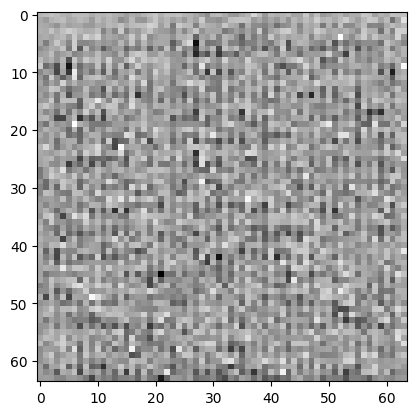

In [26]:
seed = 33
random = tf.random.uniform((1, 1024))
image = model.decoder(random)
plt.imshow(image.numpy().reshape(64, 64, 1), cmap='gray')